<a href="https://colab.research.google.com/github/Decadent-tech/Home-Loan-Defaulters-/blob/main/Hoam_Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("The total shape of the dataframe: {}".format(df.shape))

The total shape of the dataframe: (307511, 122)


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Pre processing

In [36]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [38]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (48744, 121)


In [37]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [39]:
# Dropping columns that contain more than 50 percent null values per feature
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)
        df_test.drop([column], axis = 1, inplace = True)

In [40]:
def mean_imputation(data):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    imputed_data = data.fillna(data.mean()).copy()
    return imputed_data

def median_imputation(data):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    imputed_data = data.fillna(data.median()).copy()
    return imputed_data

def mode_imputation(data):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    imputed_data = data.fillna(data.mode()).copy()
    return imputed_data

In [41]:
mean_imputation(df_train['FLOORSMAX_AVG'])
mean_imputation(df_train['FLOORSMAX_MEDI'])
mean_imputation(df_train['FLOORSMAX_MODE'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'])

,YEARS_BEGINEXPLUATATION_MODE
0,0.972200
1,0.985100
2,0.977065
3,0.977065
4,0.977065
...,...
307506,0.978200
307507,0.972700
307508,0.981600
307509,0.977200


In [42]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i])

In [43]:
df_train_converted = df_train[features_with_low_null_values]

In [44]:
## This is done to get the categorical features. We can then perform mode imputation to get the values respectively.
## The suggestion was implemented from the website https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
total_columns =df_train_converted.columns
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [45]:
categorical_data = df_train_converted[categorical_columns]

In [46]:
mode_imputation(categorical_data)

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,Working,Cash loans,House / apartment,Y,M,WEDNESDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Business Entity Type 3
1,State servant,Cash loans,House / apartment,N,F,MONDAY,Higher education,N,Married,Family,School
2,Working,Revolving loans,House / apartment,Y,M,MONDAY,Secondary / secondary special,Y,Single / not married,Unaccompanied,Government
3,Working,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Civil marriage,Unaccompanied,Business Entity Type 3
4,Working,Cash loans,House / apartment,Y,M,THURSDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Working,Cash loans,With parents,N,M,THURSDAY,Secondary / secondary special,N,Separated,Unaccompanied,Services
307507,Pensioner,Cash loans,House / apartment,Y,F,MONDAY,Secondary / secondary special,N,Widow,Unaccompanied,XNA
307508,Working,Cash loans,House / apartment,Y,F,THURSDAY,Higher education,N,Separated,Unaccompanied,School
307509,Commercial associate,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Married,Unaccompanied,Business Entity Type 1


In [47]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [48]:
numeric_data.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,TARGET,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
categorical_data.head()

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,Working,Cash loans,House / apartment,Y,M,WEDNESDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Business Entity Type 3
1,State servant,Cash loans,House / apartment,N,F,MONDAY,Higher education,N,Married,Family,School
2,Working,Revolving loans,House / apartment,Y,M,MONDAY,Secondary / secondary special,Y,Single / not married,Unaccompanied,Government
3,Working,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Civil marriage,Unaccompanied,Business Entity Type 3
4,Working,Cash loans,House / apartment,Y,M,THURSDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Religion


In [50]:
import missingno as msno
import matplotlib.pyplot as plt

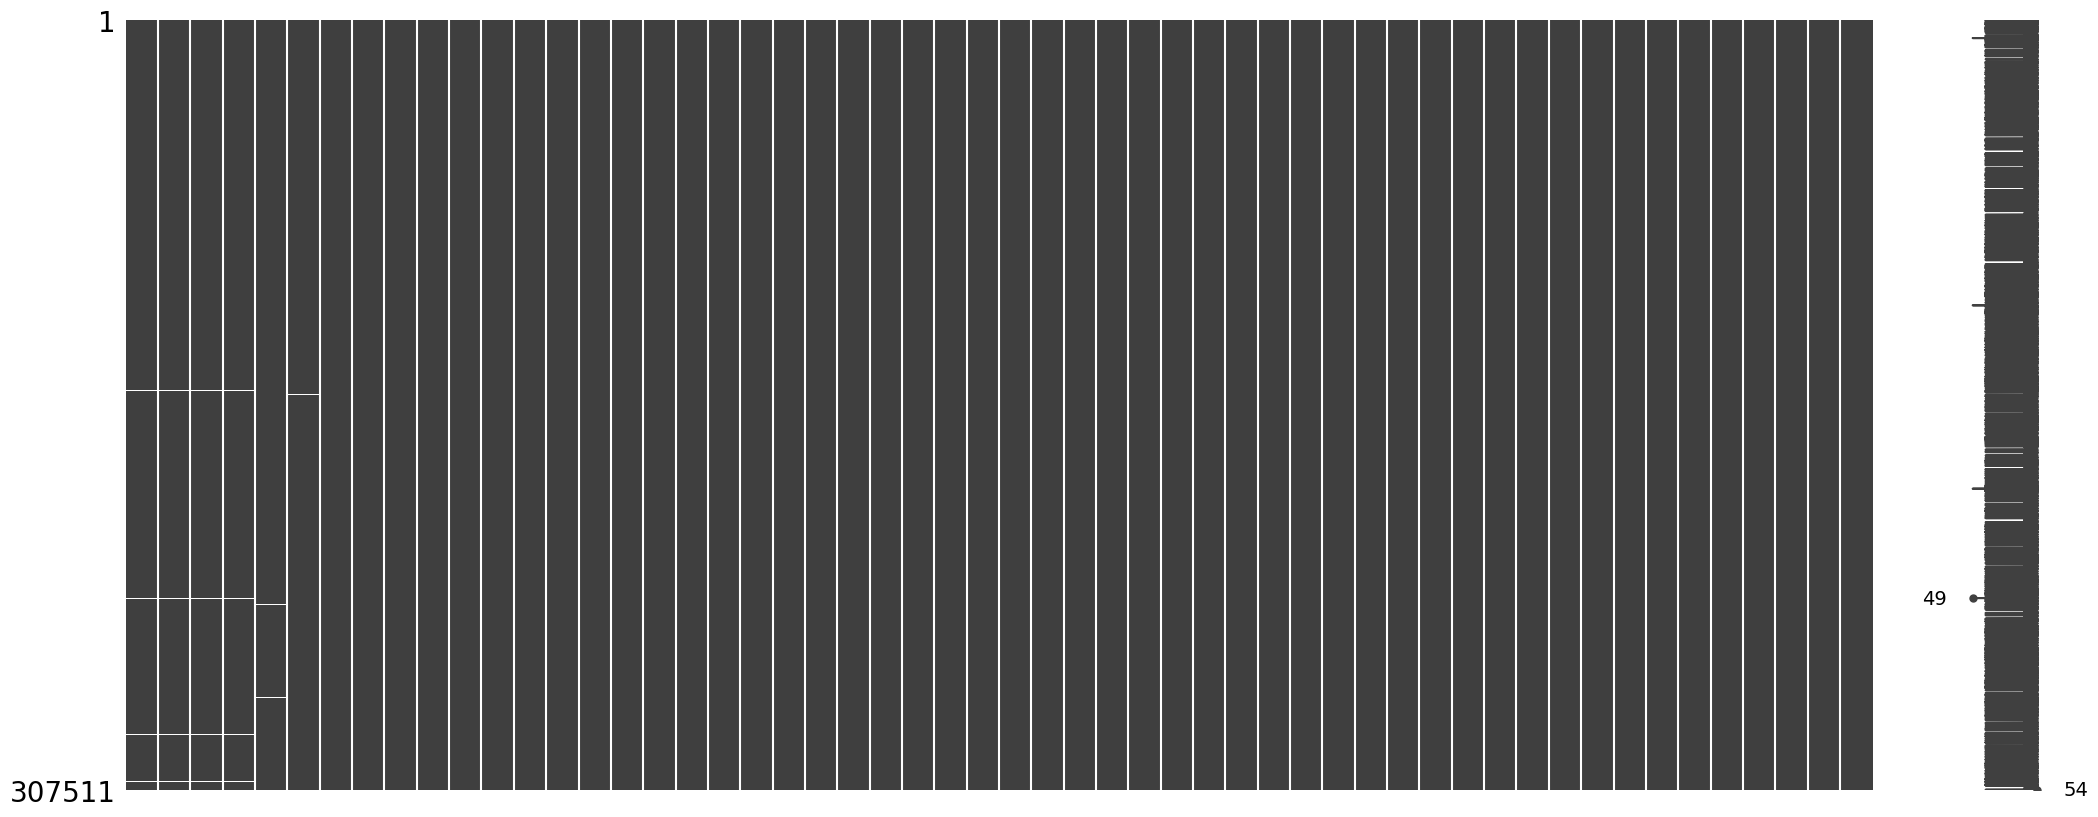

In [51]:
msno.matrix(numeric_data)
plt.show()

In [52]:
has_missing = numeric_data.isnull().any()
missing_data_columns = numeric_data.columns[has_missing]

In [53]:
missing_data_columns

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [54]:
# Showing data with features that have missing values
numeric_data[missing_data_columns].head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0


In [55]:
# Imputing the missing values with the mean of the data
mean_imputation(numeric_data[missing_data_columns])

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0
...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.681632,225000.0,27558.0,1.0,-273.0
307507,0.0,0.0,0.0,0.0,0.115992,225000.0,12001.5,1.0,0.0
307508,6.0,0.0,6.0,0.0,0.535722,585000.0,29979.0,1.0,-1909.0
307509,0.0,0.0,0.0,0.0,0.514163,319500.0,20205.0,2.0,-322.0


In [56]:
numeric_data.fillna(numeric_data.mean(), inplace = True)

In [57]:
has_missing = categorical_data.isnull().any()
missing_data_columns = categorical_data.columns[has_missing]

In [58]:
print("The shape of numeric data: {}".format(numeric_data.shape))
print("The shape of categorical data: {}".format(categorical_data.shape))

The shape of numeric data: (307511, 54)
The shape of categorical data: (307511, 11)


In [59]:
# concatenating the categorical and numerical column
df_final = pd.concat([numeric_data, categorical_data], axis = 1)

In [60]:
df_final.shape

(307511, 65)

In [61]:
df_final.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,TARGET,...,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,1,...,Cash loans,House / apartment,Y,M,WEDNESDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Business Entity Type 3
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,Cash loans,House / apartment,N,F,MONDAY,Higher education,N,Married,Family,School
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,Revolving loans,House / apartment,Y,M,MONDAY,Secondary / secondary special,Y,Single / not married,Unaccompanied,Government
3,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Civil marriage,Unaccompanied,Business Entity Type 3
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,Cash loans,House / apartment,Y,M,THURSDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Religion


### Visualization Univariate and Bivariate Analysis

In [7]:
df['NAME_CONTRACT_TYPE'].value_counts()

,count
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279


<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

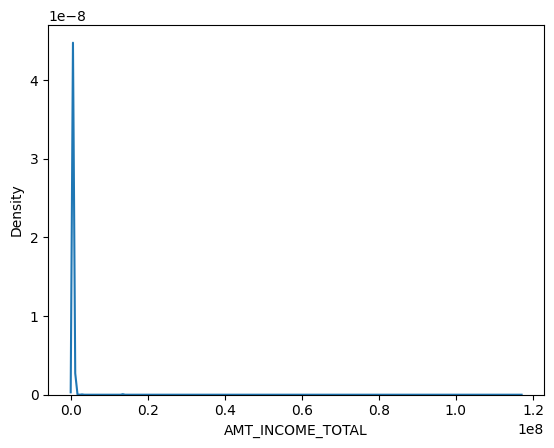

In [8]:
sns.kdeplot(x = 'AMT_INCOME_TOTAL',data = df )

In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.columns = [col.lower() for col in df.columns]

In [11]:
df[df.target == 1].shape

(24825, 122)

In [13]:
df[df.target == 0].shape

(282686, 122)

In [12]:
defaulted_df = df[df.target == 1]
non_defaulted_df = df[df.target == 0]

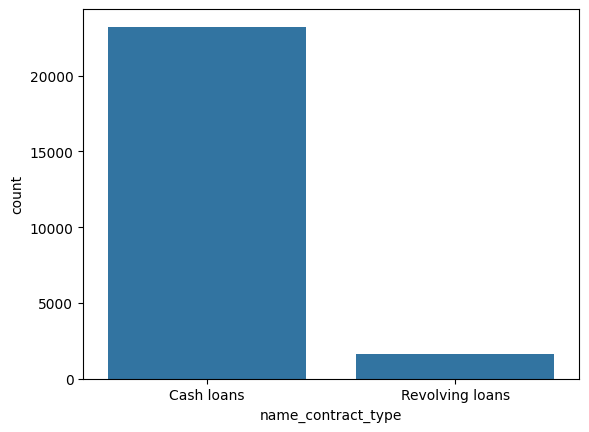

In [14]:
sns.countplot(data = defaulted_df, x = 'name_contract_type')
plt.show()

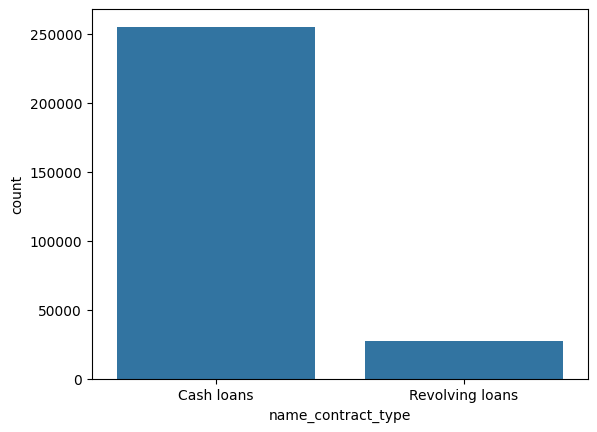

In [15]:
sns.countplot(data = non_defaulted_df, x = 'name_contract_type')
plt.show()

In [16]:
defaulted_df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


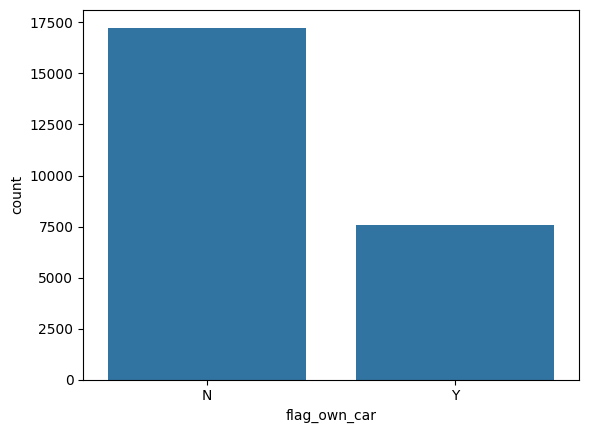

In [17]:
sns.countplot(data = defaulted_df, x = 'flag_own_car')
plt.show()

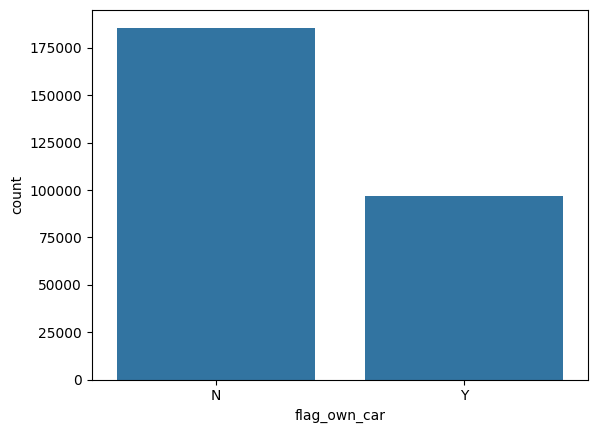

In [18]:
sns.countplot(data = non_defaulted_df, x = 'flag_own_car')
plt.show()

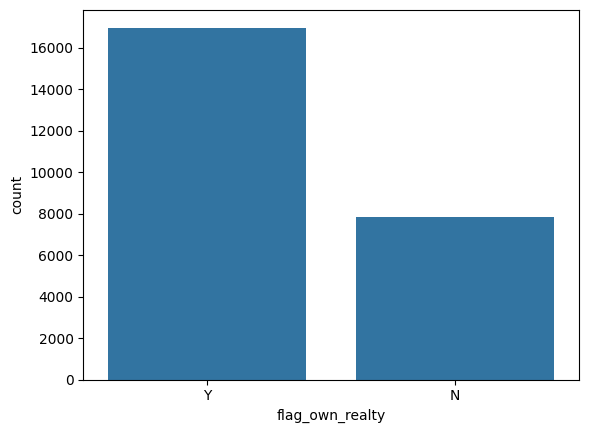

In [19]:
sns.countplot(data = defaulted_df, x = 'flag_own_realty')
plt.show()

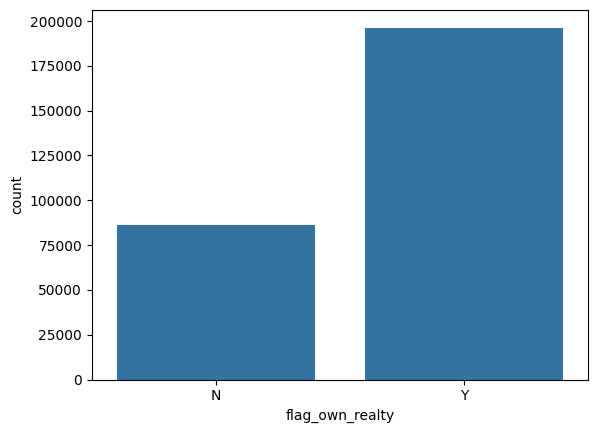

In [20]:
sns.countplot(data = non_defaulted_df, x = 'flag_own_realty')
plt.show()

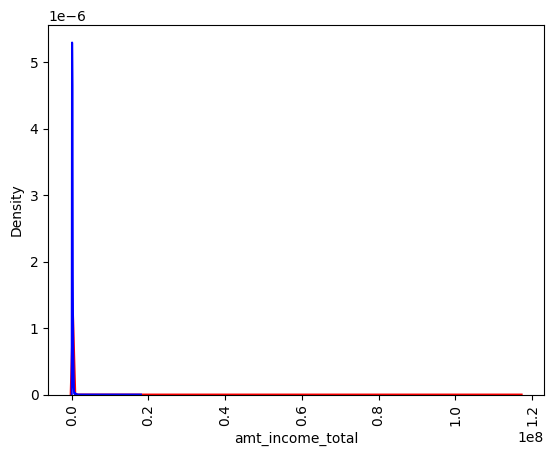

In [24]:
ax1 = sns.kdeplot(data = defaulted_df, x = 'amt_income_total',color='red')
ax2 = sns.kdeplot(data = non_defaulted_df, x = 'amt_income_total' , color='blue')
plt.xticks(rotation = 90)
plt.show()




In [25]:
threshold_income = 500000
defaulted_income_df = defaulted_df[defaulted_df['amt_income_total'] < threshold_income]
non_defaulted_income_df = non_defaulted_df[non_defaulted_df['amt_income_total'] < threshold_income]

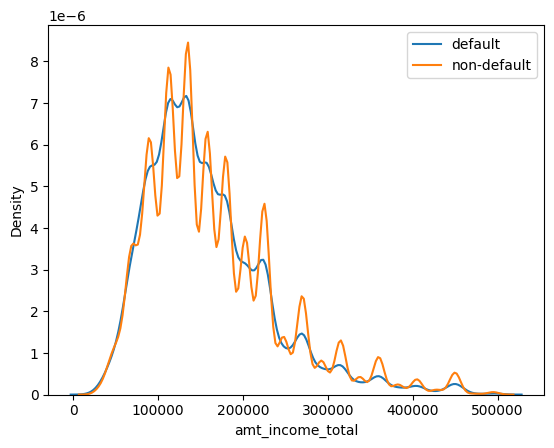

In [26]:
sns.kdeplot(data = defaulted_income_df, x = 'amt_income_total', label = 'default')
sns.kdeplot(data = non_defaulted_income_df, x = 'amt_income_total', label = 'non-default')
plt.legend()
plt.show()

In [27]:
df['name_education_type'].value_counts()

,count
name_education_type,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


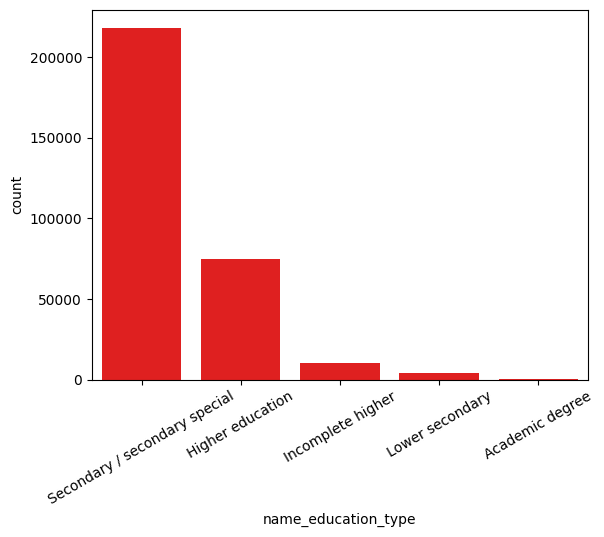

In [29]:
sns.countplot(data = df, x = 'name_education_type' , color='red')
plt.xticks(rotation = 30)
plt.show()

In [30]:
df['name_education_type'].value_counts().values

array([218391,  74863,  10277,   3816,    164])

In [31]:
df['name_education_type'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object', name='name_education_type')

In [32]:
total = sum(df['name_education_type'].value_counts().values)

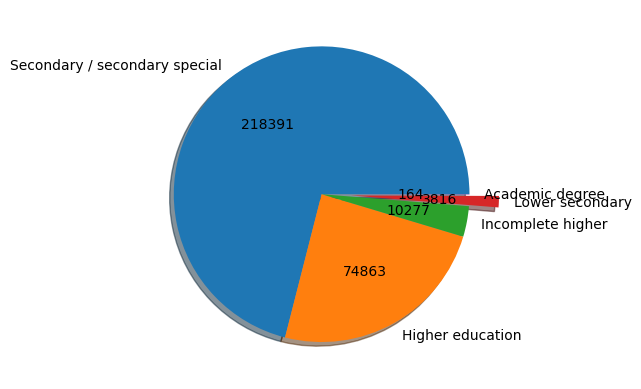

In [33]:
plt.pie(df['name_education_type'].value_counts().values,
       labels = df['name_education_type'].value_counts().index,
        autopct = lambda p: '{:.0f}'.format(p * total / 100),
       startangle = 0, explode = [0, 0, 0, 0.2, 0],
       shadow = True)
plt.show()

In [34]:
defaulted_df['name_education_type'].value_counts()

,count
name_education_type,
Secondary / secondary special,19524
Higher education,4009
Incomplete higher,872
Lower secondary,417
Academic degree,3


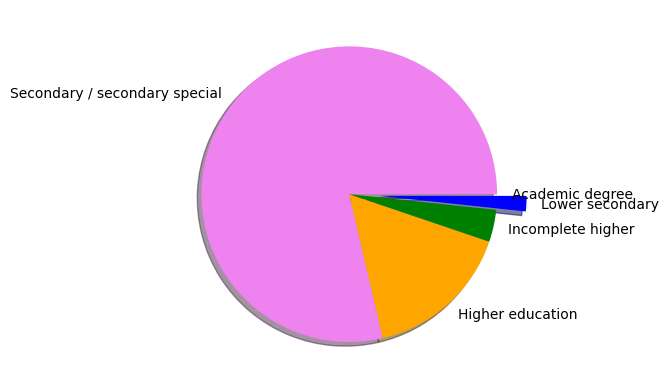

In [35]:
mycolors = ['violet', 'orange', 'green', 'blue', 'purple']
plt.pie(defaulted_df['name_education_type'].value_counts().values,
       labels = defaulted_df['name_education_type'].value_counts().index,
       explode = [0, 0, 0, 0.2, 0],
       shadow = True, colors = mycolors)
plt.show()

### Model Training

In [63]:
df_final['TARGET']

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [64]:
from sklearn.model_selection import train_test_split

# Adding input and output to variables
X = df_final.drop(['TARGET'], axis = 1)
y = df_final['TARGET']

# Splitting data into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101,
                                                   test_size = 0.3)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
df_final.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,TARGET,...,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,1,...,Cash loans,House / apartment,Y,M,WEDNESDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Business Entity Type 3
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,Cash loans,House / apartment,N,F,MONDAY,Higher education,N,Married,Family,School
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,Revolving loans,House / apartment,Y,M,MONDAY,Secondary / secondary special,Y,Single / not married,Unaccompanied,Government
3,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Civil marriage,Unaccompanied,Business Entity Type 3
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,Cash loans,House / apartment,Y,M,THURSDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Religion


In [67]:
categorical_data = df_final.select_dtypes(include = ['object', 'category'])
categorical_data.columns

Index(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE',
       'FLAG_OWN_REALTY', 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Performing one hot encoding operation
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train.select_dtypes(include = ['object', 'category']))
X_test_ohe = encoder.transform(X_test.select_dtypes(include = ['object', 'category']))

In [69]:
X_train_ohe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2367827 stored elements and shape (215257, 106)>

In [70]:
from scipy.sparse import hstack

In [71]:
# Concatenating categorical and numerical features with hstach
X_train_ohe = hstack([X_train.select_dtypes(exclude = ['object', 'category']), X_train_ohe])
X_test_ohe = hstack([X_test.select_dtypes(exclude = ['object', 'category']), X_test_ohe])

In [72]:
X_train_ohe,X_test_ohe

(<COOrdinate sparse matrix of dtype 'float64'
 	with 7144967 stored elements and shape (215257, 159)>,
 <COOrdinate sparse matrix of dtype 'float64'
 	with 3062262 stored elements and shape (92254, 159)>)

In [73]:
# Reseting index to reduce ambiguity
y_train_reset = y_train.reset_index(drop = True)
y_test_reset = y_test.reset_index(drop = True)